# Assignment: Training Your Neural Networks with PyTorch  

### Learning goals
By completing this assignment you will:  
- Build and train a simple feedforward neural network (MLP) in PyTorch.  
- Observe underfitting and overfitting, and try basic mitigation strategies.  
- Compare performance on regression and classification tasks.  



## Datasets

- **Regression:**  
  - [Energy Efficiency Dataset](https://archive.ics.uci.edu/dataset/242/energy+efficiency)   

- **Classification:**  
  - [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine) (`sklearn.datasets.load_wine`)  



## Tasks  

1. **Data preparation**  
   - Load the dataset.  
   - Split into train/validation/test sets.  
   - Standardize features.  
   - Use **k-fold cross-validation** (e.g., 5-fold) on the training set to evaluate models more robustly.  

2. **Build a baseline network**  
   - Use a simple MLP (1 hidden layer, e.g., 32 units, ReLU).  
   - Use the appropriate loss for the task you selected.  
   - Experiment with different architectures to improve performance compared to baseline

3. **Training**  
   - Train with `SGD` or `Adam`.  
   - Plot **training and validation loss curves**.  

4. **Experiment: Overfitting**  
   - Make your model larger (e.g., 4 hidden layers with more units).  
   - Show whether the model overfits (compare train vs val losses across folds).  

5. **Experiment: Regularization**  
   - Add **L2 regularization** (weight decay).  
   - Add **Dropout** to hidden layers.  
   - Compare results with the baseline using cross-validation scores.  

6. **Report results**  
   - Report the corresponding metrics for the task you selected:  
   - Use **cross-validation** results to justify your conclusions (not just a single split).  
   - Explain what you observed about underfitting/overfitting.  


## Bonus exercises

- Implement **early stopping** based on validation loss.  
- Compare **optimizers** (SGD vs Adam).  
- Try different **batch sizes** (e.g., 16, 64, 256) and observe how training curves differ.  


## Deliverables  

- A notebook containing:  
  - Your PyTorch code (data prep, model, training loop).  
  - Plots of training/validation loss.  
  - Final evaluation on the test set.  
  - Your observations/explanations for the experiments.  
  - The experiments that led to your final architectures.


# Wine dataset ( Classification )

## Loading and exploring

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names
print(target_names)
# Convert to DataFrame for easy exploration
df_wine = pd.DataFrame(X, columns=feature_names)
df_wine['classes'] = pd.Categorical.from_codes(y, target_names)
df_wine.head()
df_wine.describe()

['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from matplotlib import pyplot as plt
# Pairplot to visualize feature relationships
sns.pairplot(df_wine, hue='classes', palette='Set1')
plt.suptitle("Wine Dataset Feature Relationships", y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target


# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels for the full training set and the test set
y_train_full_cat = to_categorical(y_train_full)
y_test_cat = to_categorical(y_test)


print("X_train_full shape:", X_train_full.shape)
print("X_test shape:", X_test.shape)
print("y_train_full_cat shape:", y_train_full_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

X_train_full shape: (142, 13)
X_test shape: (36, 13)
y_train_full_cat shape: (142, 3)
y_test_cat shape: (36, 3)


## Building and Training model

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Use the full scaled training data for k-fold cross-validation
X_scaled = X_train_full_scaled
y_cat = y_train_full_cat


# Define the number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results for each fold
fold_loss = []
fold_accuracy = []
fold_histories = []
models = [] # Store models from each fold to potentially evaluate later

# K-fold Cross-Validation
for fold, (train_index, val_index) in enumerate(kf.split(X_scaled, y_cat)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split data into training and validation sets for the current fold
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train_cat, y_val_cat = y_cat[train_index], y_cat[val_index]

    # Define a simple feedforward network (re-initialize for each fold)
    model = Sequential([
        Dense(10, input_dim=X_train.shape[1], activation='relu'),  # first hidden layer
        Dense(10, activation='relu'),               # second hidden layer
        Dense(3, activation='softmax')              # output layer for 3 classes (Wine dataset)
    ])

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=100, verbose=0)
    fold_histories.append(history)
    models.append(model) # Store the trained model

    # Evaluate model on the validation set of the current fold
    loss, accuracy = model.evaluate(X_val, y_val_cat, verbose=0)
    print(f"Fold {fold+1} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

    fold_loss.append(loss)
    fold_accuracy.append(accuracy)

# Report average performance across all folds
print("\nAverage Performance across Folds:")
print(f"Average Validation Loss: {np.mean(fold_loss):.4f}")
print(f"Average Validation Accuracy: {np.mean(fold_accuracy):.4f}")

# Note: To evaluate on the test set (X_test_scaled, y_test_cat),
# you would typically train a final model on the entire training set (X_train_full_scaled, y_train_full_cat)
# or average the predictions of the models trained in each fold.
# For now, we have X_test_scaled and y_test_cat ready for evaluation.

Fold 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Validation Loss: 0.0041, Validation Accuracy: 1.0000
Fold 2/5
Fold 2 - Validation Loss: 0.2788, Validation Accuracy: 0.9655
Fold 3/5
Fold 3 - Validation Loss: 0.0181, Validation Accuracy: 1.0000
Fold 4/5
Fold 4 - Validation Loss: 0.0009, Validation Accuracy: 1.0000
Fold 5/5
Fold 5 - Validation Loss: 0.0044, Validation Accuracy: 1.0000

Average Performance across Folds:
Average Validation Loss: 0.0612
Average Validation Accuracy: 0.9931


In [ ]:
# Evaluate on test data
from sklearn.metrics import classification_report
import numpy as np

# To evaluate on the test set, we can use one of the trained models from the folds
# For simplicity, let's use the model trained in the last fold (models[-1])
# A more robust approach might involve averaging predictions or training a final model
# on the entire training set after cross-validation.

if models: # Check if models list is not empty
    final_model = models[-1] # Get the model from the last fold

    # 1. Get predicted probabilities
    y_pred_prob = final_model.predict(X_test_scaled)

    # 2. Convert probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)  # predicted class indices
    y_true = np.argmax(y_test_cat, axis=1)   # true class indices

    # 3. Generate classification report
    report = classification_report(y_true, y_pred)
    print("Test Set Evaluation:")
    print(report)
else:
    print("No models were trained during cross-validation.")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.87      0.93      0.90        14
           2       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



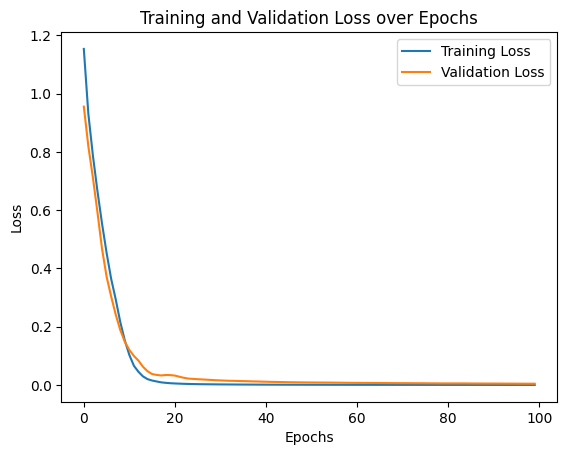

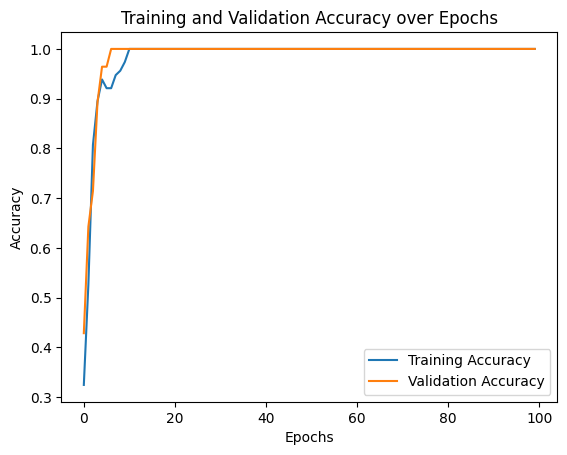

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


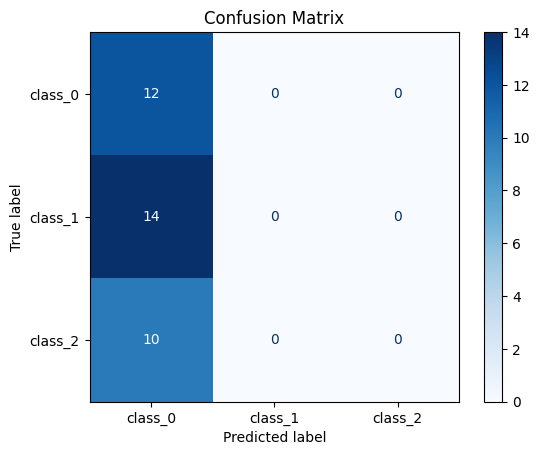

In [ ]:
import numpy as np

# Predict class probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Letter dataset - classification

## Loading dataset

Shape of X: (1797, 64)
Shape of images: (1797, 8, 8)
Labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}


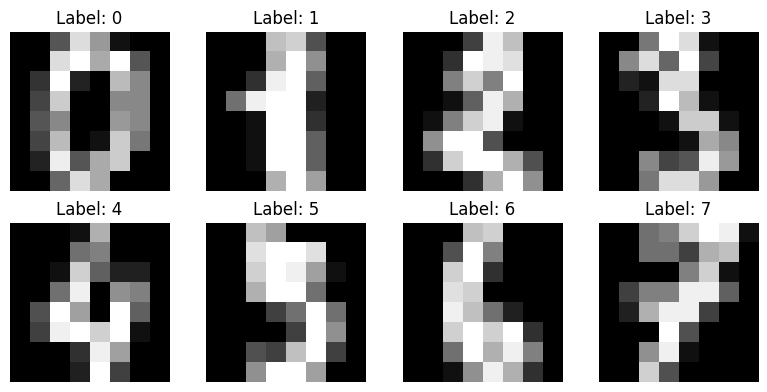

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the dataset
digits = load_digits()

# Extract data and targets
X = digits.data        # flattened image data (n_samples, 64)
y = digits.target      # labels 0–9
images = digits.images # 8x8 image arrays

print("Shape of X:", X.shape)
print("Shape of images:", images.shape)
print("Labels:", set(y))

# Display a few sample images with their labels
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Letter dataset
letters = fetch_openml("letter", version=1, as_frame=True)
X, y = letters.data, letters.target

print(X.shape, y.unique())

(20000, 16) ['Z', 'P', 'S', 'H', 'F', ..., 'T', 'C', 'G', 'B', 'J']
Length: 26
Categories (26, object): ['A', 'B', 'C', 'D', ..., 'W', 'X', 'Y', 'Z']


In [ ]:
feature_names = letters.feature_names
print(feature_names)
target_names = letters.target_names
print(target_names)

['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
['class']


In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['class'] = pd.Categorical.from_codes(y.cat.codes, categories=y.cat.categories)
df.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6,Z
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10,P
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10,S
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8,H
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7,H


## Data Preparation - Letter Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # 0.25 * 0.8 = 0.2

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# One-hot encode labels for classification
y_train_cat = to_categorical(y_train.cat.codes)
y_val_cat = to_categorical(y_val.cat.codes)
y_test_cat = to_categorical(y_test.cat.codes)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("y_val_cat shape:", y_val_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

X_train shape: (12000, 16)
X_val shape: (4000, 16)
X_test shape: (4000, 16)
y_train_cat shape: (12000, 26)
y_val_cat shape: (4000, 26)
y_test_cat shape: (4000, 26)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple feedforward network with an additional hidden layer
model = Sequential([
    Dense(10, input_dim=16, activation='relu'),  # first hidden layer
    Dense(10, activation='relu'),               # second hidden layer
    Dense(26, activation='softmax')              # output layer for 26 classes
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3453 - loss: 2.2057 - val_accuracy: 0.6787 - val_loss: 1.0652
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6846 - loss: 1.0289 - val_accuracy: 0.7000 - val_loss: 0.9560
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7258 - loss: 0.9068 - val_accuracy: 0.7387 - val_loss: 0.8669
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7455 - loss: 0.8303 - val_accuracy: 0.7445 - val_loss: 0.8381
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7544 - loss: 0.8043 - val_accuracy: 0.7483 - val_loss: 0.8118
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7548 - loss: 0.7959 - val_accuracy: 0.7495 - val_loss: 0.8037
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7703 - loss: 0.7590 - val_accuracy: 0.7477 - val_loss: 0.7863
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7647 - loss: 0.7556 - val_accuracy: 0.7485

We can notice that the training accuracy is consistently higher than the validation accuracy and continues to increase throughout the epochs.

## Evaluation and Visualization - Letter Dataset

Test Loss: 0.6753
Test Accuracy: 0.7865
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           A       0.74      0.89      0.81       158
           B       0.63      0.80      0.70       153
           C       0.78      0.73      0.75       147
           D       0.77      0.74      0.75       161
           E       0.68      0.68      0.68       154
           F       0.80      0.73      0.76       155
           G       0.76      0.61      0.67       155
           H       0.62      0.69      0.65       147
           I       0.87      0.84      0.86       151
           J       0.78      0.82      0.80       149
           K       0.78      0.72      0.75       148
           L       0.95      0.84      0.89       152
           M       0.94      0.92      0.93       158
           N       0.88      0.85      0.87       157
           O       0.78      0.86      0.82       150
           P       0.91      0

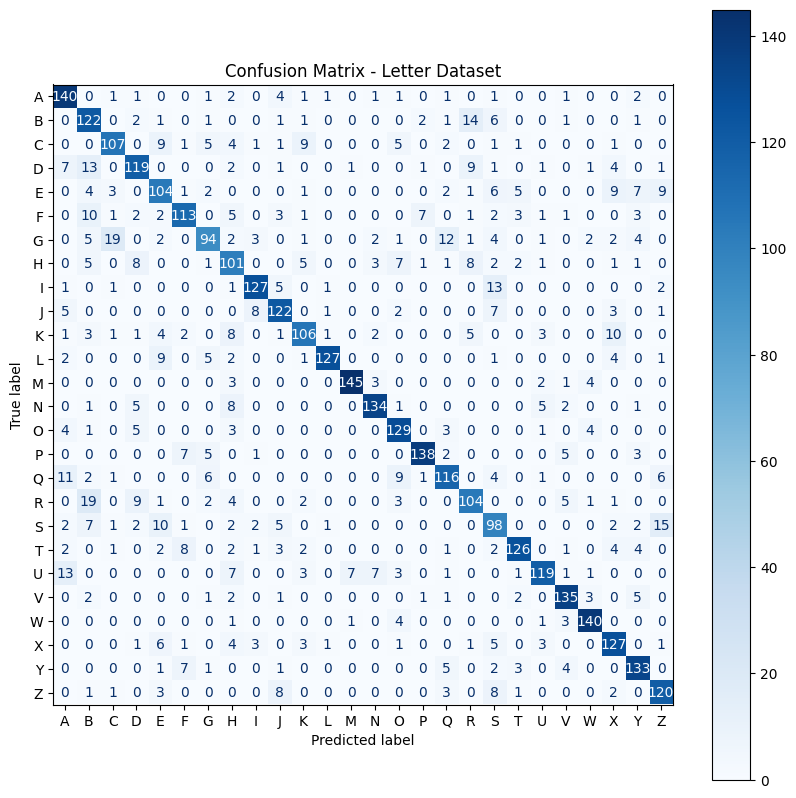

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Get predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = np.argmax(y_test_cat, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=y.cat.categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.cat.categories)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Letter Dataset")
plt.show()

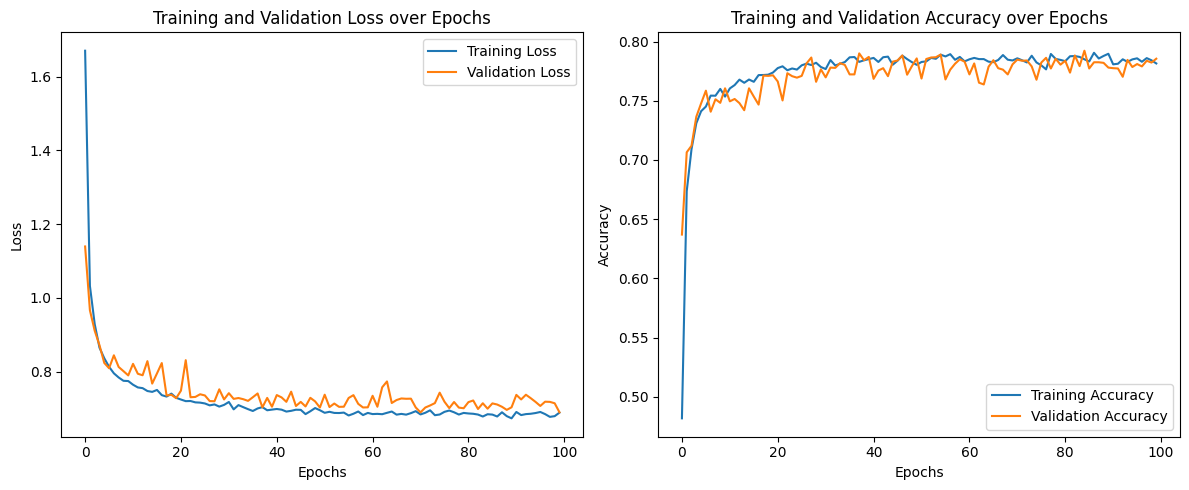

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

There are signs of overfitting, therefore we`ll try implementing Early Stopping and check the difference

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping callback
# Monitor validation loss ('val_loss')
# Stop training when validation loss stops improving for 'patience' number of epochs
# 'restore_best_weights' restores model weights from the epoch with the best monitored value
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Early Stopping callback defined.")

Early Stopping callback defined.


In [ ]:
# Define a simple feedforward network with an additional hidden layer
model = Sequential([
    Dense(10, input_dim=16, activation='relu'),  # first hidden layer
    Dense(10, activation='relu'),               # second hidden layer
    Dense(26, activation='softmax')              # output layer for 26 classes
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with Early Stopping callback
history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=100, verbose=1, callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3213 - loss: 2.2782 - val_accuracy: 0.6768 - val_loss: 1.0786
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6706 - loss: 1.0594 - val_accuracy: 0.7013 - val_loss: 0.9463
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7112 - loss: 0.9241 - val_accuracy: 0.7430 - val_loss: 0.8472
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7274 - loss: 0.8720 - val_accuracy: 0.7370 - val_loss: 0.8565
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7371 - loss: 0.8553 - val_accuracy: 0.7362 - val_loss: 0.8539
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7458 - loss: 0.8388 - val_accuracy: 0.7525 - val_loss: 0.8047
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7499 - loss: 0.8089 - val_accuracy: 0.7460 - val_loss: 0.8333
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7629 - loss: 0.7828 - val_accuracy: 0.7452

Test Loss: 0.6828
Test Accuracy: 0.7955
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.89      0.92       158
           B       0.75      0.84      0.79       153
           C       0.94      0.59      0.72       147
           D       0.75      0.86      0.80       161
           E       0.71      0.63      0.67       154
           F       0.85      0.75      0.80       155
           G       0.66      0.79      0.72       155
           H       0.74      0.50      0.59       147
           I       0.83      0.81      0.82       151
           J       0.83      0.85      0.84       149
           K       0.74      0.73      0.74       148
           L       0.92      0.82      0.87       152
           M       0.78      0.96      0.86       158
           N       0.92      0.83      0.88       157
           O       0.80      0.88      0.84       150
           P       0.91      0

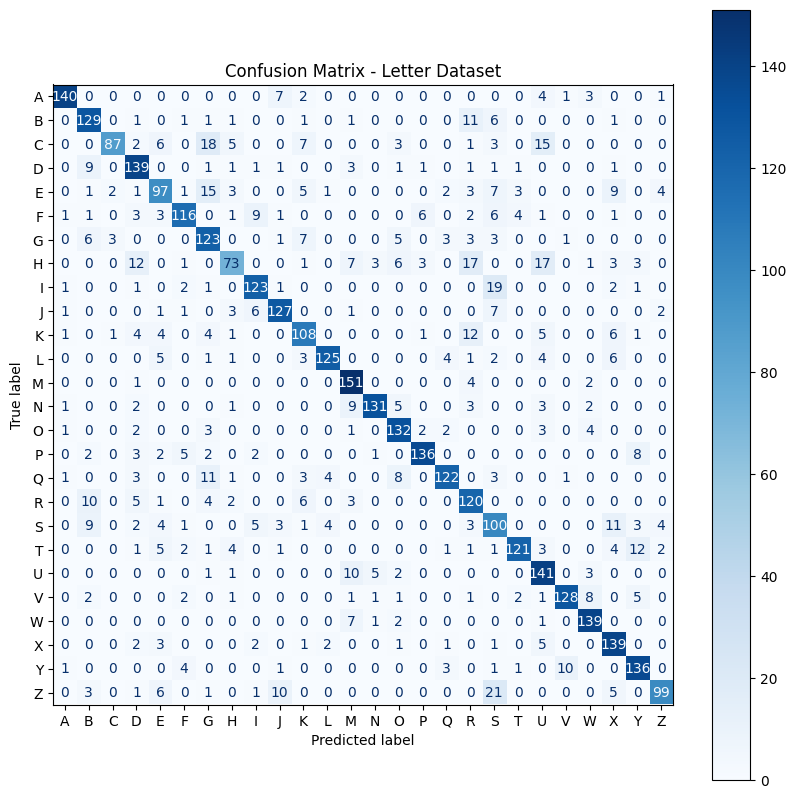

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Get predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = np.argmax(y_test_cat, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=y.cat.categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.cat.categories)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Letter Dataset")
plt.show()

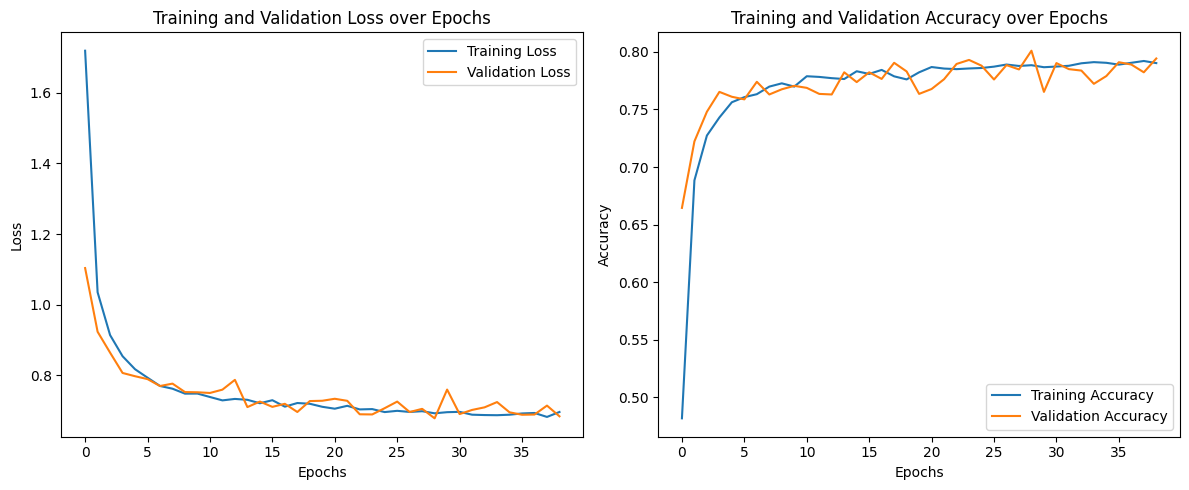

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Even from the plot we can notice a huge difference

## L2 Regularization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# We`ll add the  l2 kernel regularizer with parameter value 0.1
model_l2 = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.1)),  # first hidden layer with L2
    Dense(64, activation='relu', kernel_regularizer=l2(0.1)),               # second hidden layer with L2
    Dense(26, activation='softmax')              # output layer for 26 classes
])

# Compile model
model_l2.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history_l2 = model_l2.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2442 - loss: 3.7307 - val_accuracy: 0.4535 - val_loss: 2.2571
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4558 - loss: 2.2145 - val_accuracy: 0.4988 - val_loss: 2.0500
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4964 - loss: 2.0803 - val_accuracy: 0.5328 - val_loss: 1.9625
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5279 - loss: 1.9904 - val_accuracy: 0.5322 - val_loss: 1.9314
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5477 - loss: 1.9152 - val_accuracy: 0.5778 - val_loss: 1.8433
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5694 - loss: 1.8440 - val_accuracy: 0.5930 - val_loss: 1.7790
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5878 - loss: 1.8067 - val_accuracy: 0.5938 - val_loss: 1.8247
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5999 - loss: 1.8003 - val_accuracy: 0.5518

Test Loss: 1.3041
Test Accuracy: 0.6835
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.89      0.79       158
           B       0.49      0.76      0.60       153
           C       0.88      0.67      0.76       147
           D       0.67      0.48      0.56       161
           E       0.87      0.56      0.68       154
           F       0.84      0.45      0.58       155
           G       0.52      0.72      0.61       155
           H       0.79      0.33      0.46       147
           I       0.95      0.70      0.80       151
           J       0.73      0.78      0.75       149
           K       0.72      0.75      0.73       148
           L       0.88      0.80      0.84       152
           M       0.81      0.94      0.87       158
           N       0.97      0.64      0.77       157
           O       0.65      0.57      0.61       150
           P       0.89      0

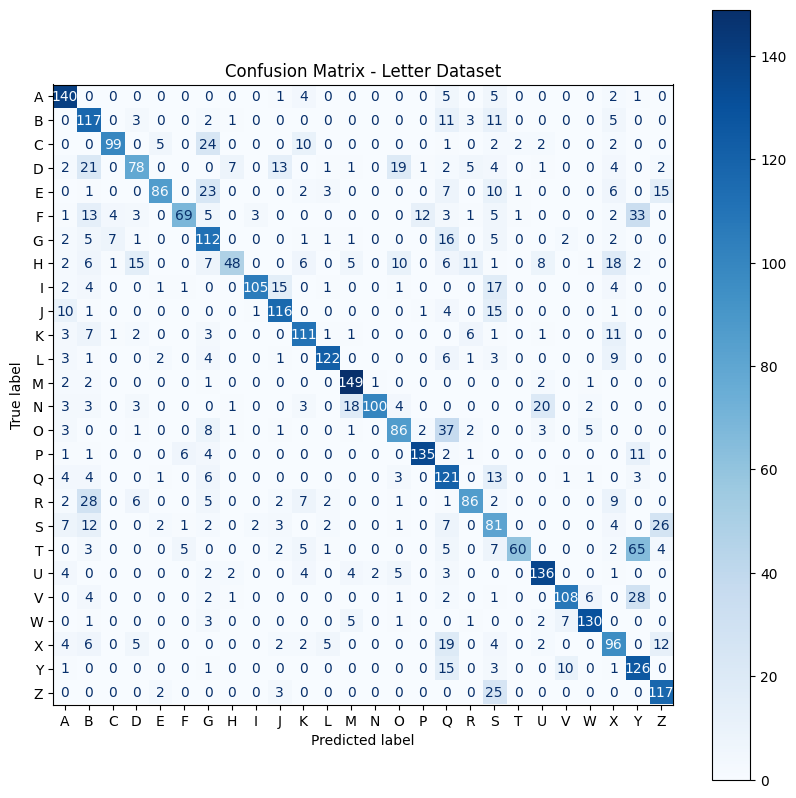

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on test data
loss, accuracy = model_l2.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Get predictions
y_pred_prob = model_l2.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = np.argmax(y_test_cat, axis=1)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=y.cat.categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.cat.categories)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix - Letter Dataset")
plt.show()

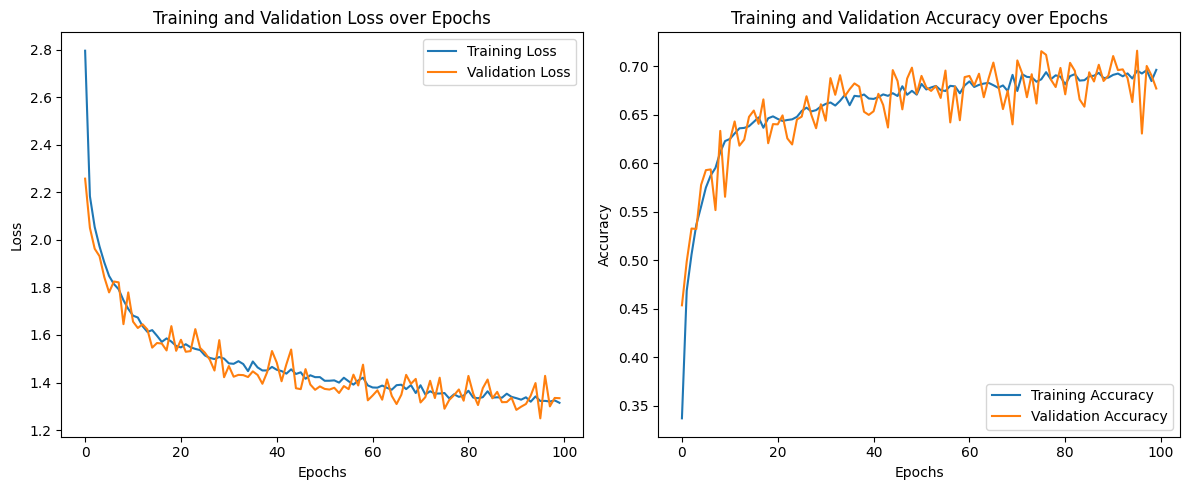

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['loss'], label='Training Loss')
plt.plot(history_l2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

We can notice that by increasing the regularization parameter the overfitting decreases, but with the current value (0.1), the validation values are still overfitting

## Dropout

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a feedforward network with Dropout layers
model_dropout = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # first hidden layer
    Dropout(0.3), # Add dropout with a rate of 30%
    Dense(64, activation='relu'),               # second hidden layer
    Dropout(0.3), # Add dropout with a rate of 30%
    Dense(26, activation='softmax')              # output layer for 26 classes
])

# Compile model
model_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history_dropout = model_dropout.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=100, verbose=1)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4577 - loss: 1.8328 - val_accuracy: 0.7703 - val_loss: 0.7187
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6808 - loss: 1.0202 - val_accuracy: 0.8160 - val_loss: 0.6080
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7233 - loss: 0.8831 - val_accuracy: 0.8350 - val_loss: 0.5348
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7363 - loss: 0.8264 - val_accuracy: 0.8363 - val_loss: 0.5220
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7550 - loss: 0.7995 - val_accuracy: 0.8550 - val_loss: 0.4640
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7552 - loss: 0.7957 - val_accuracy: 0.8580 - val_loss: 0.4300
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7608 - loss: 0.7829 - val_accuracy: 0.8540 - val_loss: 0.4586
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7719 - loss: 0.7517 - val_accu

Test Loss (with Dropout): 0.3148
Test Accuracy (with Dropout): 0.9053
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (with Dropout):
              precision    recall  f1-score   support

           A       0.97      0.96      0.96       158
           B       0.93      0.86      0.89       153
           C       0.94      0.88      0.91       147
           D       0.91      0.91      0.91       161
           E       0.89      0.83      0.86       154
           F       0.80      0.88      0.84       155
           G       0.83      0.87      0.85       155
           H       0.80      0.87      0.83       147
           I       0.92      0.95      0.93       151
           J       0.92      0.88      0.90       149
           K       0.92      0.89      0.91       148
           L       0.99      0.91      0.95       152
           M       0.96      0.97      0.97       158
           N       0.81      0.98      0.89       157
           O       0.92      0.90      

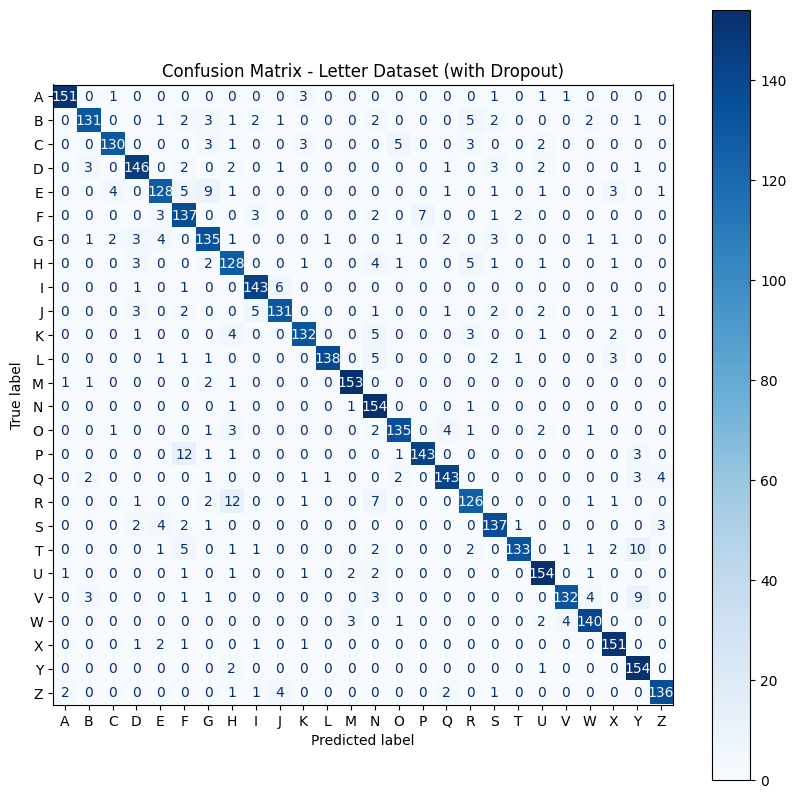

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on test data
loss_dropout, accuracy_dropout = model_dropout.evaluate(X_test, y_test_cat, verbose=0)
print(f'Test Loss (with Dropout): {loss_dropout:.4f}')
print(f'Test Accuracy (with Dropout): {accuracy_dropout:.4f}')

# Get predictions
y_pred_prob_dropout = model_dropout.predict(X_test)
y_pred_dropout = np.argmax(y_pred_prob_dropout, axis=1)

# Get true labels
y_true_dropout = np.argmax(y_test_cat, axis=1)

# Generate classification report
print("\nClassification Report (with Dropout):")
print(classification_report(y_true_dropout, y_pred_dropout, target_names=y.cat.categories))

# Confusion matrix
cm_dropout = confusion_matrix(y_true_dropout, y_pred_dropout)
disp_dropout = ConfusionMatrixDisplay(confusion_matrix=cm_dropout, display_labels=y.cat.categories)
fig_dropout, ax_dropout = plt.subplots(figsize=(10, 10))
disp_dropout.plot(cmap='Blues', ax=ax_dropout)
plt.title("Confusion Matrix - Letter Dataset (with Dropout)")
plt.show()

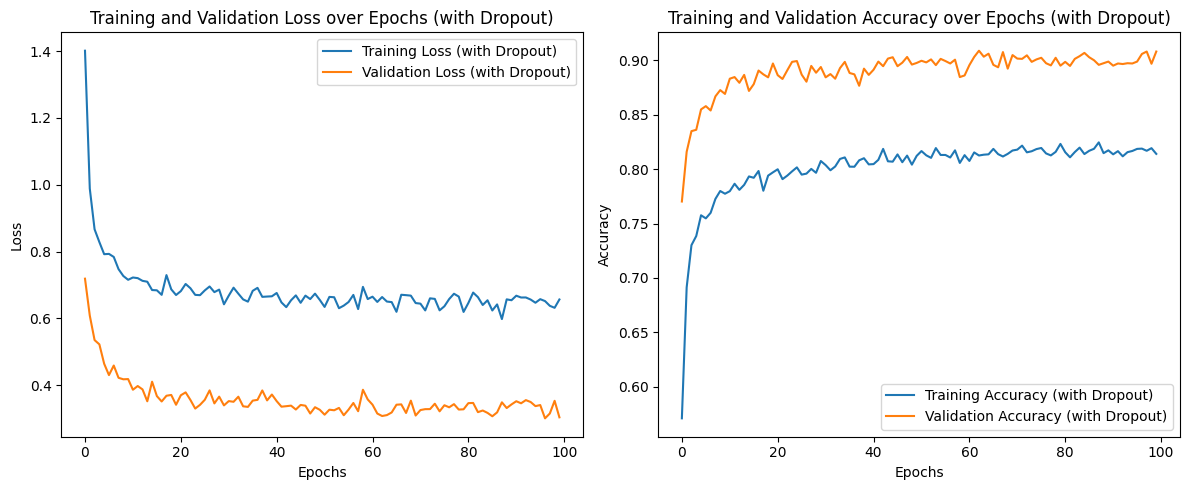

In [ ]:
# Plot training and validation loss (with Dropout)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Training Loss (with Dropout)')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss (with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (with Dropout)')
plt.legend()

# Plot training and validation accuracy (with Dropout)
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy (with Dropout)')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy (with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs (with Dropout)')
plt.legend()

plt.tight_layout()
plt.show()

We can notice that the metrics for training are worse than those in validation, so it looks like the dropout is causing the model to have a lower performance on training data ( because it wont remember the nodes) and have a better performance on validation

# Energy efficiency dataset ( Regression )

## Loading & exploring

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

## Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are already loaded from the Energy Efficiency dataset
# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data further into training and validation sets (e.g., 60% train, 20% validation of original data)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (460, 8)
X_val shape: (154, 8)
X_test shape: (154, 8)
y_train shape: (460, 2)
y_val shape: (154, 2)
y_test shape: (154, 2)


## Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple feedforward network for regression
model_regression = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),  # first hidden layer
    Dense(1, activation='linear')  # output layer for regression (predicting a single value)
])

# Compile model for regression
# Use Mean Squared Error (MSE) as the loss function for regression
model_regression.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae']) # Using MAE as a metric as well

# Train model
history_regression = model_regression.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 611.9753 - mae: 22.8931 - val_loss: 547.6735 - val_mae: 21.5948
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 463.6340 - mae: 19.8583 - val_loss: 366.1068 - val_mae: 17.6720
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 293.9767 - mae: 15.7385 - val_loss: 163.5133 - val_mae: 11.3079
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 138.0285 - mae: 10.3100 - val_loss: 57.0417 - val_mae: 5.9154
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 54.3559 - mae: 5.3430 - val_loss: 37.5834 - val_mae: 4.1155
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 35.2337 - mae: 4.0473 - val_loss: 29.7580 - val_mae: 3.7429
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 26.0872 - mae: 3.4916 - val_loss: 26.5468 - val_mae: 3.5953
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 30.1660 - mae: 3.8496 - val_loss: 24.6777 - val_mae: 3.6017
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple feedforward network for regression
# Adjusted the output layer to have 2 units to predict both Y1 and Y2
model_regression = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),  # first hidden layer
    Dense(y_train.shape[1], activation='linear')  # output layer for regression (predicting Y1 and Y2)
])

# Compile model for regression
# Use Mean Squared Error (MSE) as the loss function for regression
model_regression.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae']) # Using MAE as a metric as well

# Train model
history_regression = model_regression.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 611.7382 - mae: 22.8141 - val_loss: 537.1923 - val_mae: 21.3558
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 480.1832 - mae: 20.0697 - val_loss: 331.7727 - val_mae: 16.7748
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 261.0608 - mae: 14.8053 - val_loss: 122.5171 - val_mae: 9.6974
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 100.4456 - mae: 8.3960 - val_loss: 45.1164 - val_mae: 5.0192
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 46.1093 - mae: 4.9501 - val_loss: 33.4709 - val_mae: 4.2057
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 33.6465 - mae: 4.1217 - val_loss: 29.4637 - val_mae: 3.8154
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.6524 - mae: 3.6942 - val_loss: 26.8533 - val_mae: 3.6257
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.3813 - mae: 3.6688 - val_loss: 24.8845 - val_mae: 3.4291
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━

## Evaluation and visualization

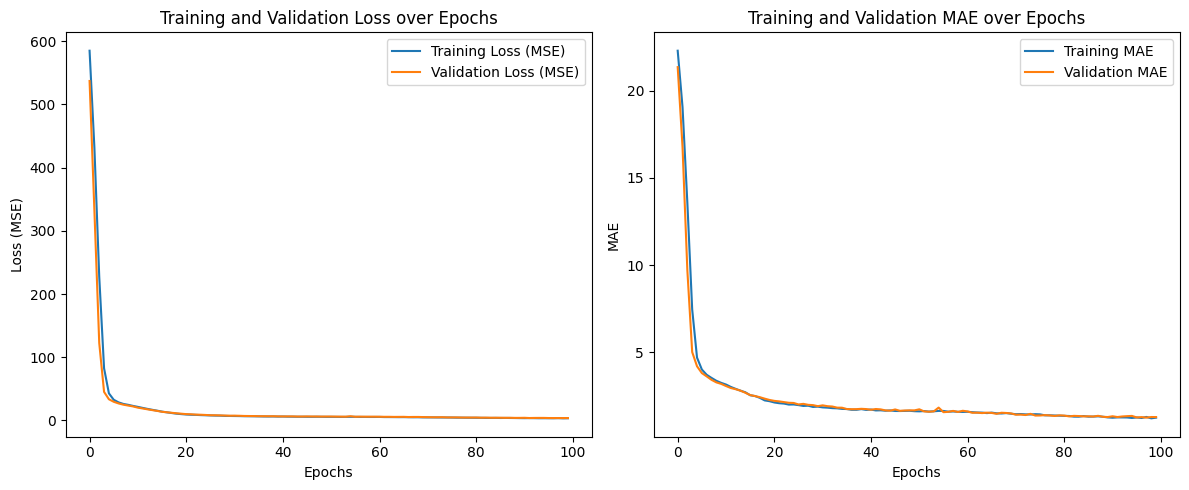

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss (MSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_regression.history['loss'], label='Training Loss (MSE)')
plt.plot(history_regression.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history_regression.history['mae'], label='Training MAE')
plt.plot(history_regression.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the test data
loss_test, mae_test = model_regression.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss_test:.4f}')
print(f'Test MAE: {mae_test:.4f}')

# Get predictions on the test set
y_pred = model_regression.predict(X_test)

# Calculate MSE and MAE for Y1 and Y2 separately on the test set
mse_y1 = mean_squared_error(y_test['Y1'], y_pred[:, 0])
mae_y1 = mean_absolute_error(y_test['Y1'], y_pred[:, 0])
mse_y2 = mean_squared_error(y_test['Y2'], y_pred[:, 1])
mae_y2 = mean_absolute_error(y_test['Y2'], y_pred[:, 1])

print("\nTest Set Evaluation (Separate Targets):")
print(f"Y1 - Test MSE: {mse_y1:.4f}, Test MAE: {mae_y1:.4f}")
print(f"Y2 - Test MSE: {mse_y2:.4f}, Test MAE: {mae_y2:.4f}")

Test Loss (MSE): 3.8338
Test MAE: 1.3635
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Test Set Evaluation (Separate Targets):
Y1 - Test MSE: 2.5760, Test MAE: 1.1851
Y2 - Test MSE: 5.0916, Test MAE: 1.5420
